In [113]:
#Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
#Reading the file
data = pd.read_csv("loan.csv" )

/var/folders/hx/jz42g3lx1md5qddcn0hbn0_h0000gn/T/ipykernel_42237/1812837777.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("loan.csv" )


In [117]:
#Understanding different Columns
data.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,39717,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,956,NaN,12020,2917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,NaN,NaN,324.561922,NaN,NaN,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,NaN,NaN,208.874874,NaN,NaN,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,NaN,NaN,15.690000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,NaN,NaN,167.020000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,NaN,NaN,280.220000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,NaN,NaN,430.780000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN


In [119]:
#Understanding the Total shape of the table
data.shape

(39717, 111)

In [121]:
#Clearly we can see many column with Nan values. Getting all the columns with Nan value
data.columns[data.isna().any()].tolist()

['emp_title',
 'emp_length',
 'desc',
 'title',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'revol_util',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il

In [123]:
#Dropping all the columns with 60% or more values with null/Nan values (60% is the assumption made )
columns_to_drop = []
for column in data.columns:
    nan_percentage = data[column].isna().mean()  # Calculate the percentage of NaN values
    if nan_percentage >= 0.6:
        print(f" {column} percentage {nan_percentage} ")
        columns_to_drop.append(column)

data.drop(columns = columns_to_drop , inplace =True)

 mths_since_last_delinq percentage 0.6466248709620566 
 mths_since_last_record percentage 0.9298537150338646 
 next_pymnt_d percentage 0.971296925749679 
 mths_since_last_major_derog percentage 1.0 
 annual_inc_joint percentage 1.0 
 dti_joint percentage 1.0 
 verification_status_joint percentage 1.0 
 tot_coll_amt percentage 1.0 
 tot_cur_bal percentage 1.0 
 open_acc_6m percentage 1.0 
 open_il_6m percentage 1.0 
 open_il_12m percentage 1.0 
 open_il_24m percentage 1.0 
 mths_since_rcnt_il percentage 1.0 
 total_bal_il percentage 1.0 
 il_util percentage 1.0 
 open_rv_12m percentage 1.0 
 open_rv_24m percentage 1.0 
 max_bal_bc percentage 1.0 
 all_util percentage 1.0 
 total_rev_hi_lim percentage 1.0 
 inq_fi percentage 1.0 
 total_cu_tl percentage 1.0 
 inq_last_12m percentage 1.0 
 acc_open_past_24mths percentage 1.0 
 avg_cur_bal percentage 1.0 
 bc_open_to_buy percentage 1.0 
 bc_util percentage 1.0 
 mo_sin_old_il_acct percentage 1.0 
 mo_sin_old_rev_tl_op percentage 1.0 
 mo_s

In [125]:
#Dropping all the columns which has same value for all the rows as they will not have any significance in making inference
columns_with_same_value = []
for column in data.columns:
    unique_values = data[column].unique()
    if len(unique_values) == 1:
        columns_with_same_value.append(column)

print("Columns with all the same values:")
print(columns_with_same_value)
data.drop(columns = columns_with_same_value , inplace =True)

Columns with all the same values:
['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt']


In [127]:
#Dropping all the columns which I feel are not relavant in analysing the given problem statement 
list_of_irrelevent_columns = ['id', 'member_id','emp_title',  'url', 'desc','title', 'zip_code', 'earliest_cr_line',
                                 'pub_rec',  'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                              'recoveries', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
                              'tax_liens', 'collection_recovery_fee', 'total_pymnt'
                             ]
data.drop(columns = list_of_irrelevent_columns , inplace =True)

In [129]:
#Understanding the choosen columns again 
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,total_acc,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,13382.528086,22.088828,0.043260
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,15885.016641,11.401709,0.204324
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,3703.000000,13.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,8850.000000,20.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,17058.000000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,149588.000000,90.000000,2.000000


In [131]:
#Listing all columns for better understanding
all_columns = data.columns.tolist()
print(len(all_columns))
print(all_columns)

24
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies']


In [133]:
#Understanding data type of each column 
for column in data.columns:
    print(f"data type of {column} is {data[column].dtype}")

data type of loan_amnt is int64
data type of funded_amnt is int64
data type of funded_amnt_inv is float64
data type of term is object
data type of int_rate is object
data type of installment is float64
data type of grade is object
data type of sub_grade is object
data type of emp_length is object
data type of home_ownership is object
data type of annual_inc is float64
data type of verification_status is object
data type of issue_d is object
data type of loan_status is object
data type of purpose is object
data type of addr_state is object
data type of dti is float64
data type of delinq_2yrs is int64
data type of inq_last_6mths is int64
data type of open_acc is int64
data type of revol_bal is int64
data type of revol_util is object
data type of total_acc is int64
data type of pub_rec_bankruptcies is float64


In [135]:
#Knowing all the columns with missing value
columns_with_missing_value = data.columns[data.isnull().any()].tolist()
print(columns_with_missing_value)

['emp_length', 'revol_util', 'pub_rec_bankruptcies']


In [137]:
#In below steps will understand emp_length column and impute the missing value
data['emp_length'].describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [139]:
#As emp_length is a categorical variable Calculating mode value to impute the missing value
data['emp_length'].mode()

0    10+ years
Name: emp_length, dtype: object

In [141]:
data['emp_length'] = data['emp_length'].apply(lambda x : '10+ years' if pd.isnull(x) else x )

In [143]:
#Converting the string to more understandable value
def convert_emp_length(val) -> int :
    if(val == '< 1 year'):
        return '0'

    elif(val == '10+ years'):
        return '11'
    else:
        return val.strip().split(' ')[0]

data['emp_length'] = data['emp_length'].apply(convert_emp_length)

In [145]:
#finally reching the column values
data['emp_length'].describe()

count     39717
unique       11
top          11
freq       9954
Name: emp_length, dtype: object

In [147]:
#In next coluple of section will Impute the missing values to revol_util column and modify the values by removing the % values
data['revol_util'].describe()

count     39667
unique     1089
top          0%
freq        977
Name: revol_util, dtype: object

In [149]:
#Striping the % value 
data['revol_util'] = data['revol_util'].str.rstrip('%').astype(float)

In [151]:
#Calculating Median for imputing the missing values
data['revol_util'].median()

49.3

In [153]:
#Imputing the null values 
data['revol_util'] = data['revol_util'].apply(lambda x : 49.3 if pd.isnull(x) else x )

In [155]:
#In next couple of sections will Impute missing values to pub_rec_bankruptcies column and modify the values 
data['pub_rec_bankruptcies'].describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [157]:
#Imputing with the mean value obtained above
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].apply(lambda x : '0.043260' if pd.isnull(x) else x )

In [159]:
#removing % character in intrest_rate column
data['int_rate'].describe()
data['int_rate'] = data['int_rate'].str.rstrip('%').astype(float)

In [161]:
data['annual_inc'].describe()


count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [163]:
#Trying to understand anual imcome skewness
from scipy.stats import skew
skewness = skew(data['annual_inc'])
print(f"Skewness: {skewness}")

Skewness: 30.948015724561007


{'whiskers': [<matplotlib.lines.Line2D at 0x283ef89b0>,
 'caps': [<matplotlib.lines.Line2D at 0x283ef88f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2843a0590>],
 'medians': [<matplotlib.lines.Line2D at 0x283c502f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x283c50830>],
 'means': []}

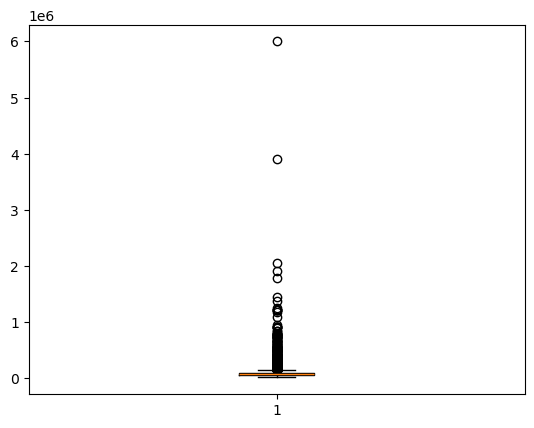

In [165]:
#As its highly right skewed understanding outliners with box polt
plt.boxplot(data=data, x='annual_inc')

{'whiskers': [<matplotlib.lines.Line2D at 0x28474a210>,
 'caps': [<matplotlib.lines.Line2D at 0x284748e60>,
 'boxes': [<matplotlib.lines.Line2D at 0x28474b440>],
 'medians': [<matplotlib.lines.Line2D at 0x2847484a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2847496a0>],
 'means': []}

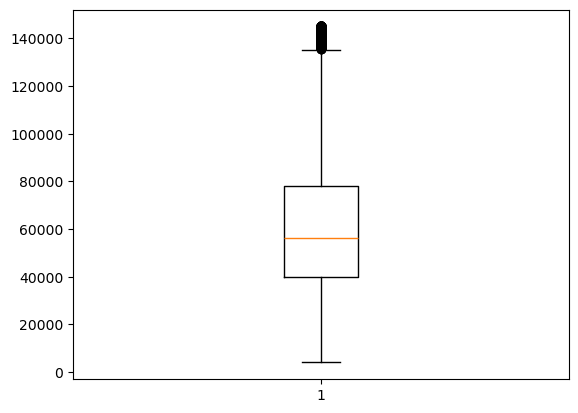

In [167]:
#Removing outliners with standard formula
Q1 = data['annual_inc'].quantile(0.25)
Q3 = data['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_removed = data[(data['annual_inc'] >= lower_bound) & (data['annual_inc'] <= upper_bound)]
plt.boxplot(data=outliers_removed, x='annual_inc')

In [169]:
#converting issue data to proper date time format for analysis 
data['issue_d'].describe()
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%d')

In [174]:
#deriving a new bad_revolve_util if revolve util is greater than 60% (60 is the assuption made)
data['good_revolve_util'] = data['revol_util'] > 60

In [176]:
#Removing all the rows where loan_status is Current as not much inference can be made
data = data[~(data['loan_status'] == 'Current')]

In [178]:
#finally checking all column
data.describe(include='all')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,good_revolve_util
count,38577.000000,38577.000000,38577.000000,38577,38577.000000,38577.000000,38577,38577,38577,38577,...,38577,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.0,38577
unique,NaN,NaN,NaN,2,NaN,NaN,7,35,11,5,...,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2
top,NaN,NaN,NaN,36 months,NaN,NaN,B,A4,11,RENT,...,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False
freq,NaN,NaN,NaN,29096,NaN,NaN,11675,2873,9521,18480,...,6949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36238.0,23923
mean,11047.025430,10784.058506,10222.481123,NaN,11.932219,322.466318,NaN,NaN,NaN,NaN,...,NaN,13.272727,0.146668,0.871737,9.275423,13289.489826,48.703551,22.052648,NaN,NaN
min,500.000000,500.000000,0.000000,NaN,5.420000,15.690000,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,NaN,NaN
25%,5300.000000,5200.000000,5000.000000,NaN,8.940000,165.740000,NaN,NaN,NaN,NaN,...,NaN,8.130000,0.000000,0.000000,6.000000,3650.000000,25.200000,13.000000,NaN,NaN
50%,9600.000000,9550.000000,8733.440000,NaN,11.710000,277.860000,NaN,NaN,NaN,NaN,...,NaN,13.370000,0.000000,1.000000,9.000000,8762.000000,49.100000,20.000000,NaN,NaN
75%,15000.000000,15000.000000,14000.000000,NaN,14.380000,425.550000,NaN,NaN,NaN,NaN,...,NaN,18.560000,0.000000,1.000000,12.000000,16912.000000,72.200000,29.000000,NaN,NaN
max,35000.000000,35000.000000,35000.000000,NaN,24.400000,1305.190000,NaN,NaN,NaN,NaN,...,NaN,29.990000,11.000000,8.000000,44.000000,149588.000000,99.900000,90.000000,NaN,NaN


In [180]:
#Finally doubling checking all data types are proper of all columns
for column in data.columns:
    print(f"data type of {column} is {data[column].dtype}")

data type of loan_amnt is int64
data type of funded_amnt is int64
data type of funded_amnt_inv is float64
data type of term is object
data type of int_rate is float64
data type of installment is float64
data type of grade is object
data type of sub_grade is object
data type of emp_length is object
data type of home_ownership is object
data type of annual_inc is float64
data type of verification_status is object
data type of issue_d is datetime64[ns]
data type of loan_status is object
data type of purpose is object
data type of addr_state is object
data type of dti is float64
data type of delinq_2yrs is int64
data type of inq_last_6mths is int64
data type of open_acc is int64
data type of revol_bal is int64
data type of revol_util is float64
data type of total_acc is int64
data type of pub_rec_bankruptcies is object
data type of good_revolve_util is bool
